In [14]:
path = "data"

import os
import javalang
dirs = os.listdir(path)

num_in = 5
def synax_file(strs):
    lines = []
    lines2 = []
    for str in strs:
        tokens = list(javalang.tokenizer.tokenize(str))
        #print(tokens)
        line = " ".join([item.value for item in tokens])
        lines.append(line)
    if len(lines) > num_in:
        for i in range(len(lines) - 5):
            p = ("\n".join(lines[0:i+5]),lines[i+5])
            lines2.append(p)
    return lines2
data = []
for file in dirs:
    f = open(os.path.join(path,file))
    data += synax_file(f.readlines())
data[:3]

[('import org . slf4j . Logger ;\nimport org . slf4j . LoggerFactory ;\npublic class Guard implements Permission {\nprivate static final Logger LOGGER = LoggerFactory . getLogger ( Guard . class ) ;\nprotected static void enter ( ) {',
  'LOGGER . info ( "You can enter" ) ;'),
 ('import org . slf4j . Logger ;\nimport org . slf4j . LoggerFactory ;\npublic class Guard implements Permission {\nprivate static final Logger LOGGER = LoggerFactory . getLogger ( Guard . class ) ;\nprotected static void enter ( ) {\nLOGGER . info ( "You can enter" ) ;',
  '}'),
 ('import org . slf4j . Logger ;\nimport org . slf4j . LoggerFactory ;\npublic class Guard implements Permission {\nprivate static final Logger LOGGER = LoggerFactory . getLogger ( Guard . class ) ;\nprotected static void enter ( ) {\nLOGGER . info ( "You can enter" ) ;\n}',
  '}')]

In [15]:
dictionary = {}
MAX_LENGTH = 30

shorten_sentences_flag = True
words_min_times = 0
reverse_flag = False

def shorten_sentences(str):
    strs = str.split("\n")
    result = ""
    length = 0
    for i in range(len(strs)):
        item = strs[i]
        if len(item.split(" ")) + length < MAX_LENGTH:
            if i < len(strs) - 1:
                result += item + "\n"
            else:
                result += item
                return result
            length = len(result.split(" "))
        else:
            break
    return result

def clean_data(data):
    for item in data:
        for item2 in item:
            words = item2.split(" ")
            for word in words:
                dictionary.setdefault(word,0)
                dictionary[word] += 1
    data2 = []
    for item in data:
        temp = []
        flag = 0
        for item2 in item:
            item2 = " ".join([token for token in item2.split(" ") if dictionary[token] > words_min_times])
            
            if reverse_flag and flag == 1:
                item2 = " ".join(reversed(item2.split(" ")))
            if shorten_sentences_flag:
                item2 = shorten_sentences(item2)
                
            temp.append(item2)
            flag += 1
        temp = tuple(temp)
        if temp[0] == "" or temp[1] == "":
            continue
        data2.append(temp)
    return data2
data2 = clean_data(data)
data2[0]

('import org . slf4j . Logger ;\nimport org . slf4j . LoggerFactory ;\npublic class Guard implements Permission {\n',
 'LOGGER . info ( "You can enter" ) ;')

In [16]:
shorten_sentences("sha sia ajss. sdasds ss. ds ssa aa a .")

'sha sia ajss. sdasds ss. ds ssa aa a .'

In [17]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [19]:
# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    #s = re.sub(r"([.!?\'])", r" \1", s)
    #s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [20]:
def readLangs(lang):
    print("Reading lines...")
    '''
    # Read the file and split into lines
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    '''
    pairs = [(normalizeString(item[0]), normalizeString(item[1])) for item in data2]
    # Reverse pairs, make Lang instances


    lang = Lang(lang)

    return lang, pairs

In [21]:
eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [22]:
def prepareData(lang):
    lang, pairs = readLangs(lang)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        #print(pair)
        lang.addSentence(pair[0])
        lang.addSentence(pair[1])
    print("Counted words:")
    print(lang.name, lang.n_words)
    return lang, pairs


lang, pairs = prepareData('lang')
print(random.choice(pairs))

Reading lines...
Read 434 sentence pairs
Trimmed to 434 sentence pairs
Counting words...
Counted words:
lang 308
('package com . iluwatar . masterworker ;\nimport java . util . arraylist ;\nimport java . util . arrays ;', '} else {')


In [23]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [24]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [25]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [26]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(lang, pair[0])
    target_tensor = tensorFromSentence(lang, pair[1])
    return (input_tensor, target_tensor)

In [27]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [28]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [29]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    print("the size of data is:", len(pairs))
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [30]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [31]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [32]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        p1 = pair[1].split(" ")
        if reverse_flag:
            p1 = reseverd(p1)
        print('=', " ".join(p1))
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        if reverse_flag:
            output_words = reseverd(output_words)
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

the size of data is: 434
0m 9s (- 0m 37s) (200 20%) 2.6626
0m 17s (- 0m 26s) (400 40%) 2.0809
0m 27s (- 0m 18s) (600 60%) 2.1813
0m 36s (- 0m 9s) (800 80%) 1.9015
0m 46s (- 0m 0s) (1000 100%) 1.7921


<Figure size 432x288 with 0 Axes>

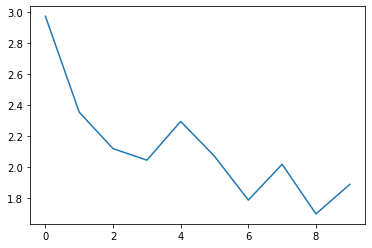

In [33]:
hidden_size = 256
encoder1 = EncoderRNN(lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, lang.n_words, dropout_p=0.1).to(device)
pairs = pairs
trainIters(encoder1, attn_decoder1, 1000, print_every=200)

In [34]:
evaluateRandomly(encoder1, attn_decoder1)

> package com . iluwatar . mediator ;
import org . slf4j . logger ;
import org . slf4j . loggerfactory ;
public abstract class partymemberbase implements partymember {
= protected party party ;
< } <EOS>

> package callable ;
import java . util . arraylist ;
import java . util . date ;
import java . util . list ;
= import java . util . concurrent . threadpoolexecutor ;
< } <EOS>

> package callable ;
import java . util . arraylist ;
import java . util . date ;
import java . util . list ;
= for ( future < string > fut : futurelist ) {
< } <EOS>

> package callable ;
import java . util . arraylist ;
import java . util . date ;
import java . util . list ;
= import java . util . concurrent . executionexception ;
< } <EOS>

> package callable ;
import java . util . arraylist ;
import java . util . date ;
import java . util . list ;
= import java . util . concurrent . timeunit ;
< } <EOS>

> package com . iluwatar . masterworker . system ;
import com . iluwatar . masterworker . input ;
impor

In [57]:
pairs

[('hello doctor , i get a cough for the last few days , which is heavy during night times .  no contact with any covid-19 persons .',
  'hello , i understand your concern .  i just have a few more questions .'),
 ('thank you doctor , i have phlegm but not a lot .  a tiny amount comes out most of the time .',
  'hi , i would recommend you take n-acetylcysteine 200 mg powder dissolved in water three times a day .'),
 ('hello doctor , i am suffering from coughing , throat infection from last week .  two days later , i consulted with a doctor .',
  'hello , i can understand your concern .  in my opinion , you should get done a chest x-ray and cbc ( complete blood count ) .'),
 ('thank you doctor , after doing all these i can upload all for further query .',
  'hi , yes , upload in this query only .  i will see and revert to you .'),
 ('thank you doctor , as per your guidelines , i have made one test .  fever is coming every 12 hours .  please advice .',
  'hi , i can understand your concer

In [24]:
lang.n_words

5391

In [27]:
pairs

[('thank you doctor , after doing all these i can upload all for further query .',
  '. you to revert and see will i . only query this in upload , yes , hi'),
 ('i have covid 19 symptoms ?',
  ". say to impossible 's it details any without"),
 ('do i have covid 19 ?', ". say to impossible 's it details any without"),
 ('is the coronavirus 229e the same as covid-19 ?',
  '. viruses different but , ) covid-19 of cause the ( sars-cov-2 to related biologically . colds common cause that coronaviruses several of one is cov229e'),
 ('where can i be tested for covid 19 ?',
  '. live you where is up set your what here idea no have we , department health local , doctor local your'),
 ('am i at risk for covid-19 in the united states ?',
  '. measures prophylactic important most the probably are recommendations washing hand following and travel avoiding . us in weeks few next the over up pick likely will infections covid'),
 ('should i shave my beard to reduce my chances of contracting coronavirus